## MIE 1624 - Assignment 1

## Question 1

Before analyzing the data, it is important to note what type of data is being explored. In this case, the data is a sample data as it is a survey. Functions like shape, and columns were used to see size of the survey sample as well as the names of the columns.

In [2]:
#importing modules
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from scipy import stats

In [3]:
#Reading file and outputting first 5 rows 
raw_data = "clean_kaggle_data.csv"
file = pd.read_csv(raw_data, index_col = 0)

#displaying only the first 5 columns
file.head()

/home/jupyterlab/conda/envs/python/lib/python3.6/site-packages/IPython/core/interactiveshell.py:3072: DtypeWarning: Columns (207) have mixed types.Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


,Time from Start to Finish (seconds),Q1,Q2,Q3,Q4,Q5,Q6,Q7_Part_1,Q7_Part_2,Q7_Part_3,...,Q35_B_Part_2,Q35_B_Part_3,Q35_B_Part_4,Q35_B_Part_5,Q35_B_Part_6,Q35_B_Part_7,Q35_B_Part_8,Q35_B_Part_9,Q35_B_Part_10,Q35_B_OTHER
1,289287,30-34,Man,United States of America,Master’s degree,Data Engineer,5-10 years,Python,R,SQL,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,860,35-39,Man,Argentina,Bachelor’s degree,Software Engineer,10-20 years,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,None,NaN
3,507,30-34,Man,United States of America,Master’s degree,Data Scientist,5-10 years,Python,NaN,SQL,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
8,762,35-39,Man,Germany,Doctoral degree,Data Scientist,5-10 years,Python,NaN,SQL,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
11,742,35-39,Man,United States of America,Doctoral degree,Research Scientist,1-2 years,NaN,R,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


#### Data Exploration

Exploring the full data set first

In [77]:
file.shape

(10729, 355)

In [78]:
file.columns

Index(['Time from Start to Finish (seconds)', 'Q1', 'Q2', 'Q3', 'Q4', 'Q5',
       'Q6', 'Q7_Part_1', 'Q7_Part_2', 'Q7_Part_3',
       ...
       'Q35_B_Part_2', 'Q35_B_Part_3', 'Q35_B_Part_4', 'Q35_B_Part_5',
       'Q35_B_Part_6', 'Q35_B_Part_7', 'Q35_B_Part_8', 'Q35_B_Part_9',
       'Q35_B_Part_10', 'Q35_B_OTHER'],
      dtype='object', length=355)

To summarize the main characteristics of the survey dataset, Q1, Q2, Q3, Q4, Q6 and Q24 were extracted from the original data frame and renamed as Age, Gender, Country, Education, Professional Experience and Salary accordingly. The new data frame consists of categorical and quantitative data. 

Selecting the columns corresponding to Country, Age, Education, Professional Experience and Salary and renaming them

In [79]:
#creating a main table with only the Country, Age, Education, Professional Experience and Salary
main_data = file[['Q1', 'Q2', 'Q3', 'Q4', 'Q6', 'Q24']]
main_data.head()

,Q1,Q2,Q3,Q4,Q6,Q24
1,30-34,Man,United States of America,Master’s degree,5-10 years,125000
2,35-39,Man,Argentina,Bachelor’s degree,10-20 years,20000
3,30-34,Man,United States of America,Master’s degree,5-10 years,150000
8,35-39,Man,Germany,Doctoral degree,5-10 years,80000
11,35-39,Man,United States of America,Doctoral degree,1-2 years,40000


In [80]:
#Changing the column names to match the information in them 
table = main_data.rename(columns = {'Q1': 'Age', 'Q2': "Gender", 'Q3': 'Country', 'Q4': 'Education', 'Q6': 'Professional_Experience', "Q24": 'Salary'})
table.head()

,Age,Gender,Country,Education,Professional_Experience,Salary
1,30-34,Man,United States of America,Master’s degree,5-10 years,125000
2,35-39,Man,Argentina,Bachelor’s degree,10-20 years,20000
3,30-34,Man,United States of America,Master’s degree,5-10 years,150000
8,35-39,Man,Germany,Doctoral degree,5-10 years,80000
11,35-39,Man,United States of America,Doctoral degree,1-2 years,40000


Describe the Table

Since the Salary column is the only quantitative column in the table, the describe function was used once on the original data frame and again on a new data frame that extracted all the categorical columns (Age, Gender, Country, Education and Professional Experience)

In [81]:
table.describe()

,Salary
count,10729.000000
mean,48777.239258
std,69458.784233
min,1000.000000
25%,2000.000000
50%,20000.000000
75%,70000.000000
max,500000.000000


In [82]:
#since Salary is the only column in the table that has quantative data, i described the data again but not including salary this time to get information based on the categorical data 
all_columns = table[['Age', 'Gender', 'Country', 'Education', 'Professional_Experience']].describe()
all_columns

,Age,Gender,Country,Education,Professional_Experience
count,10729,10729,10729,10729,10729
unique,11,5,55,7,7
top,25-29,Man,India,Master’s degree,3-5 years
freq,2350,8872,2353,4879,2444


Cleaning Data

- Cleaning the data to only contain records that have Male or Female in Gender the Column and Bachelor, Masters or PhD in Education Column

In [83]:
#Viewing all options listed under Gender
table.Gender.unique()

array(['Man', 'Woman', 'Nonbinary', 'Prefer not to say',
       'Prefer to self-describe'], dtype=object)

Checking the value count of each to make sure that the records that did not contain these were only a limited amount

In [84]:
#checking the Value counts of each column
table['Gender'].value_counts()

Man                        8872
Woman                      1683
Prefer not to say           131
Prefer to self-describe      23
Nonbinary                    20
Name: Gender, dtype: int64

In [85]:
#calculating how much of the Data isnt men or women
total = 131 + 23 + 20
total2 = 8872 + 1683
per = (total/total2)*100
print('Total percent of records that are not Male or Female is: %.1f' % per )

Total percent of records that are not Male or Female is: 1.6


In [86]:
table.drop(table[table['Gender'] == 'Prefer not to say'].index, inplace = True)
table.drop(table[table['Gender'] == 'Nonbinary'].index, inplace = True)
table.drop(table[table['Gender'] == 'Prefer to self-describe'].index, inplace = True)

In [87]:
table['Gender'].value_counts()

Man      8872
Woman    1683
Name: Gender, dtype: int64

In [88]:
#Repeating the same steps for Education
table.Education.unique()

array(['Master’s degree', 'Bachelor’s degree', 'Doctoral degree',
       'Some college/university study without earning a bachelor’s degree',
       'Professional degree', 'I prefer not to answer',
       'No formal education past high school'], dtype=object)

In [89]:
table['Education'].value_counts()

Master’s degree                                                      4812
Bachelor’s degree                                                    2970
Doctoral degree                                                      1683
Professional degree                                                   464
Some college/university study without earning a bachelor’s degree     376
I prefer not to answer                                                145
No formal education past high school                                  105
Name: Education, dtype: int64

In [90]:
table.drop(table[table['Education'] == 'Professional degree'].index, inplace = True)
table.drop(table[table['Education'] == "Some college/university study without earning a bachelor’s degree"].index, inplace = True)
table.drop(table[table['Education'] == 'I prefer not to answer'].index, inplace = True)
table.drop(table[table['Education'] == 'No formal education past high school'].index, inplace = True)
table.drop(table[table['Professional_Experience'] == 'I have never written code'].index, inplace = True)

In [91]:
table['Education'].value_counts()

Master’s degree      4598
Bachelor’s degree    2796
Doctoral degree      1632
Name: Education, dtype: int64

In [92]:
table['Gender'].value_counts()

Man      7608
Woman    1418
Name: Gender, dtype: int64

## Question 1 Plots

- Exploratory data analysis to analyze survey data set and summarize its main characteristics
- 3 graphical figures that represent different trends in the data
- (considering Country, Age, Education, Professional Experience, and Salary)

In [93]:
#Reviewing table descriptives
all_columns = table[['Age', 'Gender', 'Country', 'Education', 'Professional_Experience']].describe()
all_columns

,Age,Gender,Country,Education,Professional_Experience
count,9026,9026,9026,9026,9026
unique,11,2,55,3,6
top,25-29,Man,India,Master’s degree,3-5 years
freq,2049,7608,1984,4598,2231


Creating boxplots to show the relationship between Professional Experience and Salary

In [94]:
df =table[['Professional_Experience','Salary']]
df

,Professional_Experience,Salary
1,5-10 years,125000
2,10-20 years,20000
3,5-10 years,150000
8,5-10 years,80000
11,1-2 years,40000
...,...,...
20022,5-10 years,10000
20029,10-20 years,20000
20033,< 1 years,1000
20034,3-5 years,1000


In [95]:
df.Professional_Experience.unique()

array(['5-10 years', '10-20 years', '1-2 years', '< 1 years', '3-5 years',
       '20+ years'], dtype=object)

Figure 1: Relationship between Professional Experience and Salary

Text(0.5, 0, 'Salary in USD')

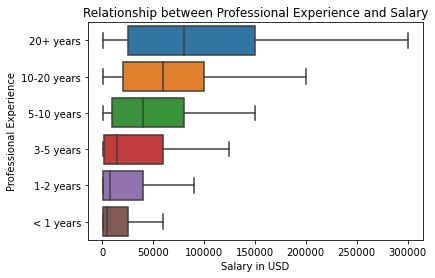

In [96]:
p1 = sns.boxplot(y="Professional_Experience", x="Salary" , showfliers = False ,data=df, order = ['20+ years', '10-20 years', '5-10 years', '3-5 years', '1-2 years', '< 1 years'])

p1.set_title("Relationship between Professional Experience and Salary")
p1.set_ylabel("Professional Experience")
p1.set_xlabel("Salary in USD")

Main relationship seen in the graph is that the more experience you have, the higher your salary will be

Outliers are removed from the graph for a cleaner visual. This being said, I would like to highlight the importance of outliers, especially in this type of relationship as it is important to note that not everyone in the data within these ranges follow this relationship. There are cases where someone with less experience can potentially have a higher salary than someone with more experience. 

Creating a bar graph to show the relationship between highest level of education and the 7 world continents

To group the countries into continents the .replace function was used to replace any country within the 7 continents with their appropriate continent. This allowed for easier data visualization as graphing 55 countries can be visually unpleasing.

In [97]:
table['Country'].replace(['Egypt', 'Ghana', 'Kenya', 'Morocco', 'Nigeria', 'South Africa', 'Tunisia' ], 'Africa', inplace = True)
table['Country'].replace(['Bangladesh', 'China', 'India', 'Indonesia', 'Iran, Islamic Republic of...', 'Israel', 'Japan', 'Malaysia', 'Nepal', 'Pakistan', 'Philippines', 'Republic of Korea', 'Saudi Arabia', 'Singapore', 'South Korea', 'Sri Lanka', 'Taiwan', 'Thailand', 'Turkey', 'United Arab Emirates', 'Viet Nam'], 'Asia', inplace = True)
table['Country'].replace(['Belarus', 'Belgium', 'France', 'Germany', 'Greece', 'Ireland', 'Italy', 'Netherlands', 'Poland', 'Portugal', 'Romania', 'Russia', 'Spain', 'Sweden', 'Switzerland', 'Ukraine', 'United Kingdom of Great Britain and Northern Ireland'], 'Europe', inplace = True)
table['Country'].replace(['Canada', 'Mexico', 'United States of America'], 'North America', inplace = True)
table['Country'].replace(['Australia'], 'Oceania', inplace = True)
table['Country'].replace(['Argentina', 'Brazil', 'Chile', 'Colombia', 'Peru'], 'South America', inplace = True)

table = table.rename(columns = {'Country': 'Continent'})

In [98]:
dfc = pd.crosstab(table['Continent'], table['Education'])
dfc

Education,Bachelor’s degree,Doctoral degree,Master’s degree
Continent,,,
Africa,245,70,192
Asia,1474,436,1664
Europe,291,503,1157
North America,396,358,843
Oceania,34,23,68
Other,147,152,364
South America,209,90,310


First plot for Highest Level of Education relative to each Continent

<AxesSubplot:title={'center':'Highest Level of Education relative to each Continent'}, xlabel='Continent', ylabel='Population'>

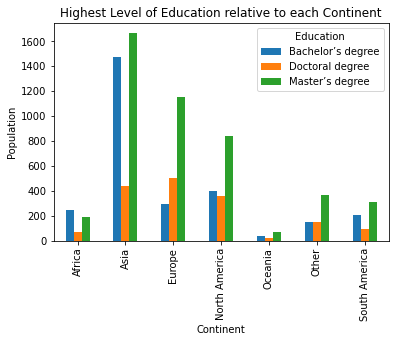

In [99]:
dfc.plot(kind='bar', xlabel = 'Continent', ylabel = 'Population', title = 'Highest Level of Education relative to each Continent')

However, this approach is misleading as in the first bar graph one would conclude that people in Asia are more likely to get their bachelor’s and master’s than all other Continents. However, once considering the percentage of people that filled out the survey from each continent it was found that Europe has the most amount of people to complete master’s as shown in Figure 2 (plot below)

In [100]:
#adding a total column 
dfc['Total'] = dfc.sum(axis=1)
dfc

Education,Bachelor’s degree,Doctoral degree,Master’s degree,Total
Continent,,,,
Africa,245,70,192,507
Asia,1474,436,1664,3574
Europe,291,503,1157,1951
North America,396,358,843,1597
Oceania,34,23,68,125
Other,147,152,364,663
South America,209,90,310,609


In [101]:
#calculating the percentages of responses for each continent and corresponding education level
for col in dfc.columns[:-1]:
    dfc[col] /= dfc["Total"]
    dfc[col] = dfc[col]*100
dfc
dfc.round(1)

Education,Bachelor’s degree,Doctoral degree,Master’s degree,Total
Continent,,,,
Africa,48.3,13.8,37.9,507
Asia,41.2,12.2,46.6,3574
Europe,14.9,25.8,59.3,1951
North America,24.8,22.4,52.8,1597
Oceania,27.2,18.4,54.4,125
Other,22.2,22.9,54.9,663
South America,34.3,14.8,50.9,609


In [102]:
#removing the total column so it does not show up in the graph
dfc = dfc.drop(columns="Total")

Final plot for the Highest Level of Education relative to each Continent

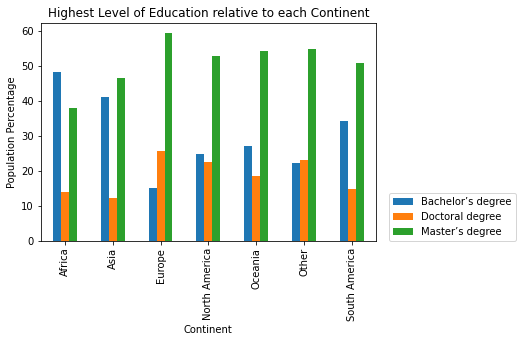

In [103]:
p2 = dfc.plot(kind='bar', xlabel = 'Continent', ylabel = 'Population Percentage', title = 'Highest Level of Education relative to each Continent')
plt.legend(loc=(1.04,0))

Comments about the graph: 
- Europe has the most amount of masters and phd graduates
- Africa has the most amount of bachelors graduate 
- it can be noted that most continents actually have master's degree as opposed to bachelors or doctoral
- it can be seen that the graph changes significantly when taking into the percentages

There is an ‘Other” group here as some of the records did not specify which country they are from. As there were a large amount of records that fell under the ‘Other” group, it was not removed. This is also something that can be looked into for further analyzation.

Creating the third graph - comparing the relationship between professional experience and salary for each continent

In [104]:
new = table[['Continent', 'Professional_Experience', 'Salary']]
new

,Continent,Professional_Experience,Salary
1,North America,5-10 years,125000
2,South America,10-20 years,20000
3,North America,5-10 years,150000
8,Europe,5-10 years,80000
11,North America,1-2 years,40000
...,...,...,...
20022,South America,5-10 years,10000
20029,Asia,10-20 years,20000
20033,South America,< 1 years,1000
20034,Asia,3-5 years,1000


In [31]:
#giving an order to the professional experience column so they follow the year of experience range accordingly
new['Professional_Experience'] = pd.Categorical(new['Professional_Experience'],categories=['< 1 years', '1-2 years', '3-5 years', '5-10 years', '10-20 years', '20+ years'],ordered=True)
new = new.sort_values('Professional_Experience',ascending=False)
new

/home/jupyterlab/conda/envs/python/lib/python3.6/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


,Continent,Professional_Experience,Salary
10104,North America,20+ years,250000
11399,Europe,20+ years,15000
11426,South America,20+ years,10000
16389,South America,20+ years,2000
2143,Africa,20+ years,4000
...,...,...,...
14898,North America,< 1 years,80000
14894,Europe,< 1 years,15000
14889,Asia,< 1 years,1000
3104,Europe,< 1 years,1000


Figure 3: Average Salary in relation to Professional Experience relative to each Continent

Text(0.5, 0, 'Professional Experience')

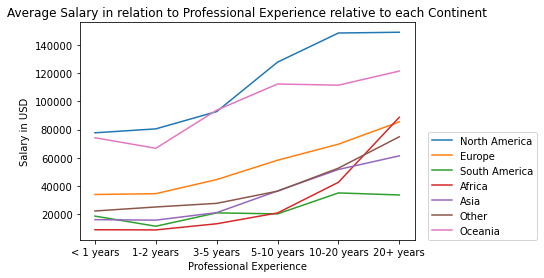

In [32]:
p3 = sns.lineplot(data=new, x="Professional_Experience", y="Salary", hue="Continent", ci = None)
plt.legend(loc=(1.04,0))

p3.set_title("Average Salary in relation to Professional Experience relative to each Continent")
p3.set_ylabel("Salary in USD")
p3.set_xlabel("Professional Experience")

The spikes in the graph for certain continents show at what range their professional experience will provide them the highest salary increase. For example, in the graph for North America, 3-5 years of professional experience can be noted as when people typically start to get the most salary increase. 

Comments about the graph: 
- North America starts off on average with the highest salary and has the largest salary increase throughout 
- Africa on average keeps the salary relatively the same until 5-10 years of experience, there is a big salary increase as indicated by the upward line
- Europe has a smooth line of salary increase but does not really have a big spike in the data meaning there is not an experience range that causes a big salary increase (salary progession seems to be steady)
- oceania is not the best indication of the salary progression as the only country included is that is australia and there was data point for every range of experience in the data 

## Question 2

Creating a new data frame with only Gender and Salary and then creating two data frames for each groups (woman and men)

In [33]:
dfg = table[['Gender', 'Salary']]
dfg

,Gender,Salary
1,Man,125000
2,Man,20000
3,Man,150000
8,Man,80000
11,Man,40000
...,...,...
20022,Man,10000
20029,Man,20000
20033,Man,1000
20034,Man,1000


In [34]:
#descriptive statistics for both genders salaries
dfg.describe()

,Salary
count,9026.000000
mean,50675.991580
std,70056.640865
min,1000.000000
25%,3000.000000
50%,25000.000000
75%,70000.000000
max,500000.000000


#### 2a) Descriptive Statistics for each group

In [35]:
#checking to make sure there is no missing data
dfg.isnull().sum()

Gender    0
Salary    0
dtype: int64

In [36]:
#creating the data frame for men and their salary
man_salary = dfg[dfg['Gender'].str.contains('Man', na = False)] 
man_salary

,Gender,Salary
1,Man,125000
2,Man,20000
3,Man,150000
8,Man,80000
11,Man,40000
...,...,...
20022,Man,10000
20029,Man,20000
20033,Man,1000
20034,Man,1000


In [37]:
#creating the data frame for woman and their salary
woman_salary = dfg[dfg['Gender'].str.contains('Woman', na = False)] 
woman_salary

,Gender,Salary
20,Woman,2000
22,Woman,150000
30,Woman,20000
44,Woman,2000
60,Woman,1000
...,...,...
19964,Woman,25000
19971,Woman,15000
19997,Woman,1000
20007,Woman,7500


Descriptive statistics for both man and woman salaries 

In [38]:
man_salary.describe()

,Salary
count,7608.000000
mean,52807.768139
std,71339.816450
min,1000.000000
25%,4000.000000
50%,25000.000000
75%,70000.000000
max,500000.000000


In [39]:
woman_salary.describe()

,Salary
count,1418.000000
mean,39238.363893
std,61498.492061
min,1000.000000
25%,1000.000000
50%,10000.000000
75%,50000.000000
max,500000.000000


In [40]:
pip install -U seaborn

Requirement already up-to-date: seaborn in /home/jupyterlab/conda/envs/python/lib/python3.6/site-packages (0.11.1)
Note: you may need to restart the kernel to use updated packages.


Creating histograms for each group to view the distribution of data

<AxesSubplot:xlabel='Salary', ylabel='Count'>

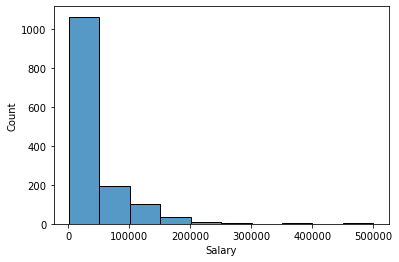

In [41]:
sns.histplot(woman_salary, x="Salary", bins=10)

<AxesSubplot:xlabel='Salary', ylabel='Count'>

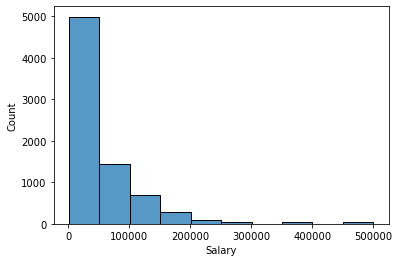

In [42]:
sns.histplot(man_salary, x="Salary", bins=10)

#### 2b) two - sample t-test with 0.05 threshold
Assumptions include 
- Independence
- Equal Variance
- Normally Distributed

Since there is only one data point for the average salaries from the original dataset, it is not suitable to conduct a t-test. However, for hypothetical purposes, if the original dataset did have enough average data sets we would do the following: to test whether a t-test is suitable, levenes test is conducted from the scipy library to test for equal variance. Since the result of this test was a very small p-value that indicates that the groups do not have equal variance. Moreover, because the groups do not have equal variance or are normally distributed a t-test can not be conducted at this time. (for the hypothetical case)

In [43]:
#Testing for equal variance of the two groups 
stats.levene(man_salary['Salary'], woman_salary['Salary'], center = 'mean')
#not equal variance and not normally distributed (as per the histograms), cannot perform t-test

LeveneResult(statistic=27.702897104480748, pvalue=1.4470258234320847e-07)

#### 2c) Bootstrap mean of salary for the two groups. Plot two bootstrapped distributions and distribution of the difference in means

Bootstrapping is typically used when a sample is small. It allows people to infer about a population data by resampling the sample data and performining inference from the resampled data

In [44]:
#intital lists
salary_males = []
salary_woman = []
salary_diff = []

#creating a loop to go through 1000 replications 
for i in range(1000):
    #creating the boostrap samples of the exact same sample size and replacement
    bootstrap_man = man_salary.sample(frac=1, replace=True)
    bootstrap_woman = woman_salary.sample(frac=1, replace=True)
    
    #taking the mean of each bootstrap sample
    male_salary_mean = bootstrap_man.Salary.mean()
    woman_salary_mean = bootstrap_woman.Salary.mean()
    
    #appending the mean of the boostrapped samples to a list and taking the difference
    salary_males.append(male_salary_mean)
    salary_woman.append(woman_salary_mean)
    salary_diff.append(male_salary_mean - woman_salary_mean)

Creating data frames for each list to be able to look at the descriptive statistics

In [45]:
malesdf = pd.DataFrame(salary_males)
malesdf.describe()

,0
count,1000.000000
mean,52783.228641
std,810.308744
min,50015.641430
25%,52271.638407
50%,52793.703996
75%,53281.890773
max,55813.748686


In [46]:
womandf = pd.DataFrame(salary_woman)
womandf.describe()

,0
count,1000.000000
mean,39220.792666
std,1626.681735
min,34704.160790
25%,38057.034556
50%,39146.685472
75%,40287.023977
max,45010.930889


In [47]:
saldiff = pd.DataFrame(salary_diff)
saldiff.describe()

,0
count,1000.000000
mean,13562.435975
std,1822.037648
min,7757.142192
25%,12418.867161
50%,13576.204396
75%,14799.226470
max,19045.334119


Plotting the distributions of the Men annd Woman Salaries

Figure 4: Distribution of Average Salary of Men and Woman

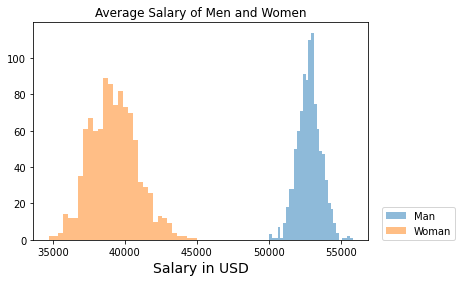

In [48]:
plt.hist(salary_males, bins = 30, alpha=0.5, label = "Man")
plt.hist(salary_woman, bins = 30, alpha=0.5, label = "Woman")

plt.xlabel("Salary in USD", size = 14)
plt.title('Average Salary of Men and Women')
plt.legend(loc=(1.04,0))

Plotting the difference of average salaries for men and woman

Figure 5: Distribution of the difference in average salary of men and women

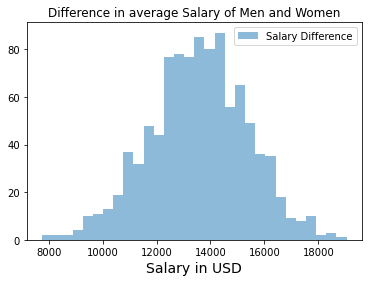

In [49]:
plt.hist(salary_diff, bins = 30, alpha=0.5, label = "Salary Difference")

plt.xlabel("Salary in USD", size = 14)
plt.title('Difference in average Salary of Men and Women')
plt.legend(loc = 'upper right')

#### 2d) two - sample t-test with 0.05 threshold on bootstrapped data
- following the sample process as 2b

In [50]:
stats.levene(salary_males, salary_woman, center = 'mean')
#the variances are not equal so going to use Welsh's T-test

LeveneResult(statistic=363.27892868249666, pvalue=1.505217974293638e-74)

In [51]:
#using ttest_ind function from scipy library and putting equal_var = False to use Welsh's T-test
tc, pc = stats.ttest_ind(salary_woman, salary_males, equal_var = False)
print ("t-test: t = %g  p = %g" % (tc, pc))

t-test: t = -235.995  p = 0


p-value = 0, therefore the null hypothesis is rejected and the difference in salary for men and women are statistically significant

#### 2e) Comment on Findings (In Assignment pdf and throughout Jupyter Notebook)

## Question 3

Creating a new data frame with Educationa and salary and then creating three more for each group (bachelor, master, and doctoral)

In [52]:
dfe = table[[ 'Salary', 'Education']]
dfe

,Salary,Education
1,125000,Master’s degree
2,20000,Bachelor’s degree
3,150000,Master’s degree
8,80000,Doctoral degree
11,40000,Doctoral degree
...,...,...
20022,10000,Master’s degree
20029,20000,Bachelor’s degree
20033,1000,Master’s degree
20034,1000,Bachelor’s degree


#### 3a) Descriptive Statistics for each group
- following the same process as 2a

In [53]:
#checking for missing values
dfe.isnull().sum()

Salary       0
Education    0
dtype: int64

In [54]:
ba = dfe[dfe['Education'].str.contains("Bachelor’s degree", na = False)] 
ba

,Salary,Education
2,20000,Bachelor’s degree
13,100000,Bachelor’s degree
14,80000,Bachelor’s degree
21,1000,Bachelor’s degree
28,70000,Bachelor’s degree
...,...,...
20011,1000,Bachelor’s degree
20013,20000,Bachelor’s degree
20018,15000,Bachelor’s degree
20029,20000,Bachelor’s degree


In [55]:
ba.describe()

,Salary
count,2796.000000
mean,36066.165951
std,60081.917125
min,1000.000000
25%,1000.000000
50%,10000.000000
75%,50000.000000
max,500000.000000


<AxesSubplot:xlabel='Salary', ylabel='Count'>

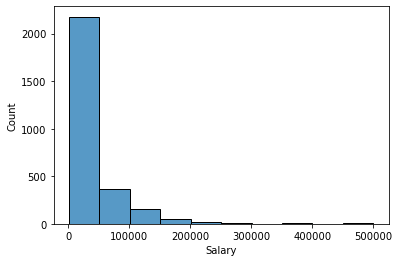

In [56]:
sns.histplot(ba, x="Salary", bins=10)

In [57]:
ma = dfe[dfe['Education'].str.contains("Master’s degree", na = False)] 
ma

,Salary,Education
1,125000,Master’s degree
3,150000,Master’s degree
22,150000,Master’s degree
24,200000,Master’s degree
30,20000,Master’s degree
...,...,...
20008,3000,Master’s degree
20015,2000,Master’s degree
20022,10000,Master’s degree
20033,1000,Master’s degree


In [58]:
ma.describe()

,Salary
count,4598.000000
mean,52769.573728
std,67601.392380
min,1000.000000
25%,4000.000000
50%,25000.000000
75%,80000.000000
max,500000.000000


<AxesSubplot:xlabel='Salary', ylabel='Count'>

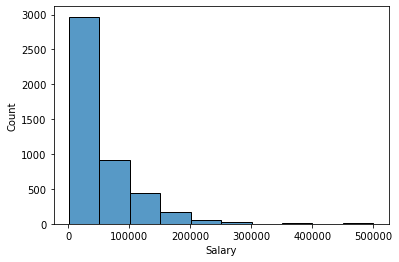

In [59]:
sns.histplot(ma, x="Salary", bins=10)

In [60]:
phd = dfe[dfe['Education'].str.contains("Doctoral degree", na = False)] 
phd

,Salary,Education
8,80000,Doctoral degree
11,40000,Doctoral degree
20,2000,Doctoral degree
32,15000,Doctoral degree
41,1000,Doctoral degree
...,...,...
19989,40000,Doctoral degree
20002,15000,Doctoral degree
20004,70000,Doctoral degree
20006,500000,Doctoral degree


In [61]:
phd.describe()

,Salary
count,1632.000000
mean,69807.598039
std,85712.134196
min,1000.000000
25%,5000.000000
50%,45000.000000
75%,100000.000000
max,500000.000000


<AxesSubplot:xlabel='Salary', ylabel='Count'>

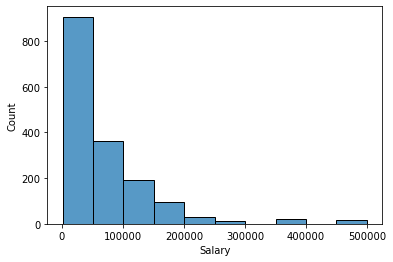

In [62]:
sns.histplot(phd, x="Salary", bins=10)

#### 3b) ANOVA test to compare means of salary
- following same process as 2b. 
- check for equal variance and if data is normally distributed

Since there is only one data point for the average salaries from the original dataset for each group, it is not suitable to conduct a t-test. However, for hypothetical purposes, if the original dataset did have enough average data sets we would do the following: to test whether a t-test is suitable, levenes test is conducted from the scipy library to test for equal variance. Since the result of this test was a very small p-value that indicates that the groups do not have equal variance. Moreover, because the groups do not have equal variance or are normally distributed a t-test can not be conducted at this time. (for the hypothetical case)

In [63]:
#using levene from scipy library to check for variance
stats.levene(ba['Salary'], ma['Salary'], phd['Salary'])
#not equal variance and clearly not normally distributed

LeveneResult(statistic=86.68254473503167, pvalue=5.144452983273195e-38)

p-value is <0.05 therefore not equal variance

#### 3c) Bootstrap mean of salary for the three groups. Plot three bootstrapped distributions and distributions of the differences in means
- same process as 2c but with the addition of a third group and two more difference distributions

In [64]:
salary_ba = []
salary_ma = []
salary_phd = []
salary_diff_bama = []
salary_diff_baphd = []
salary_diff_maphd = []

for i in range(1000):
    bootstrap_ba = ba.sample(frac=1, replace=True)
    bootstrap_ma = ma.sample(frac=1, replace=True)
    bootstrap_phd = phd.sample(frac=1, replace=True)
    
    ba_mean = bootstrap_ba.Salary.mean()
    ma_mean = bootstrap_ma.Salary.mean()
    phd_mean = bootstrap_phd.Salary.mean()
    
    salary_ba.append(ba_mean)
    salary_ma.append(ma_mean)
    salary_phd.append(phd_mean)
    salary_diff_bama.append(ma_mean - ba_mean)
    salary_diff_baphd.append(phd_mean - ba_mean)
    salary_diff_maphd.append(phd_mean - ma_mean)

Plotting the distributions of the three groups using histograms

Figure 6: Distribution of average salary of people with bachelor's, master's and doctoral degrees

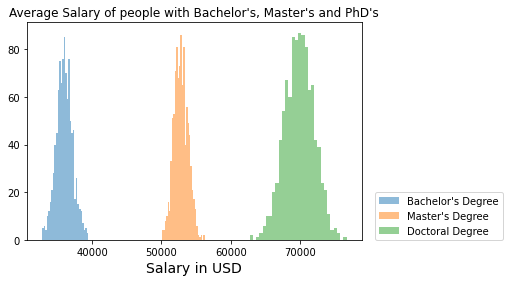

In [65]:
plt.hist(salary_ba, bins = 30, alpha=0.5, label = "Bachelor's Degree")
plt.hist(salary_ma, bins = 30, alpha=0.5, label = "Master's Degree")
plt.hist(salary_phd, bins = 30, alpha=0.5, label = "Doctoral Degree")

plt.xlabel("Salary in USD", size = 14)
plt.title("Average Salary of people with Bachelor's, Master's and PhD's")
plt.legend(loc=(1.04,0))

Plotting the distributions of the differences of each parwise group and looking and their descriptive statistics

Figure 7: Distribution of salary difference of people with bachelors and masters degree

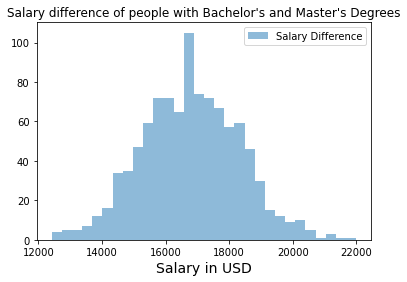

In [66]:
plt.hist(salary_diff_bama, bins = 30, alpha=0.5, label = "Salary Difference")

plt.xlabel("Salary in USD", size = 14)
plt.title("Salary difference of people with Bachelor's and Master's Degrees" )
plt.legend(loc = 'upper right')

In [106]:
saldiff_bama = pd.DataFrame(salary_diff_bama)
saldiff_bama.describe()

,0
count,1000.000000
mean,16791.997578
std,1537.744675
min,12419.678877
25%,15767.117541
50%,16793.556133
75%,17843.412104
max,21995.633403


The average difference in salary between a bachelor and a master degree graduate is $16,792

Figure 8: Distribution of salary difference of people with masters and doctoral degrees

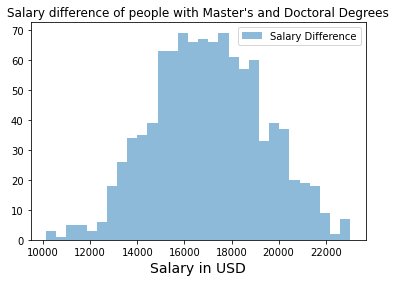

In [67]:
plt.hist(salary_diff_maphd, bins = 30, alpha=0.5, label = "Salary Difference")

plt.xlabel("Salary in USD", size = 14)
plt.title("Salary difference of people with Master's and Doctoral Degrees" )
plt.legend(loc = 'upper right')

In [107]:
saldiff_maphd = pd.DataFrame(salary_diff_maphd)
saldiff_maphd.describe()

,0
count,1000.000000
mean,17026.977588
std,2342.638426
min,10121.350315
25%,15403.851559
50%,16990.561220
75%,18680.950471
max,23042.027411


The average difference in salary between a masters and doctoral graduate is $17,027

Figure 9: Distribution of salary difference of people with bachelors and doctoral degree

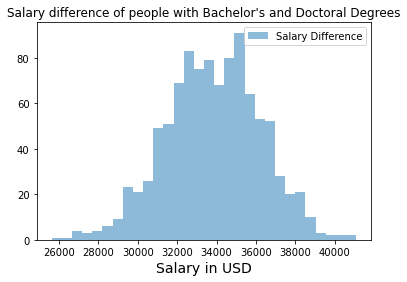

In [68]:
plt.hist(salary_diff_baphd, bins = 30, alpha=0.5, label = "Salary Difference")

plt.xlabel("Salary in USD", size = 14)
plt.title("Salary difference of people with Bachelor's and Doctoral Degrees" )
plt.legend(loc = 'upper right')

In [108]:
saldiff_baphd = pd.DataFrame(salary_diff_baphd)
saldiff_baphd.describe()

,0
count,1000.000000
mean,33818.975165
std,2403.126712
min,25638.110904
25%,32227.559197
50%,33859.473618
75%,35458.962843
max,41076.082955


The average difference in salary between a bachelor and a doctoral degree graduate is $33,819

Figure 10: Distribution of salary difference of people with bachelors, masters degree and doctoral degree

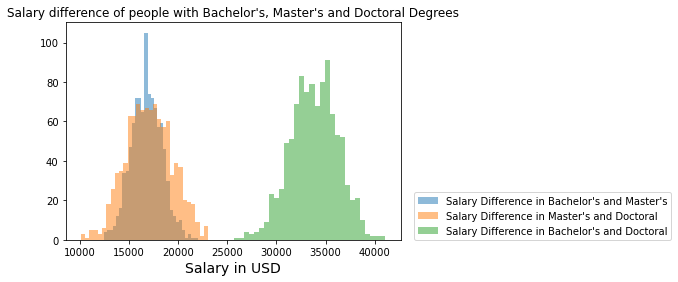

In [69]:
plt.hist(salary_diff_bama, bins = 30, alpha=0.5, label = "Salary Difference in Bachelor's and Master's")
plt.hist(salary_diff_maphd, bins = 30, alpha=0.5, label = "Salary Difference in Master's and Doctoral")
plt.hist(salary_diff_baphd, bins = 30, alpha=0.5, label = "Salary Difference in Bachelor's and Doctoral")

plt.xlabel("Salary in USD", size = 14)
plt.title("Salary difference of people with Bachelor's, Master's and Doctoral Degrees" )
plt.legend(loc=(1.04,0))

Comments: 
- The difference in salary for bachelors and masters and for mastesr and doctoral seems to fall under the same range whereas difference in bachelor and doctoral is completely different
- it can also be noted here that the distribution for masters and doctoral is a little more spread than bachelors and masters

#### 3d) ANOVA test to compare means on salary on bootstrapped data
- same process as 3b

In [70]:
stats.levene(salary_ba, salary_ma, salary_phd, center = 'mean')
#not equal variance but data is normally distributed

LeveneResult(statistic=273.83953654489625, pvalue=5.943848614190189e-110)

Equality of variance test was conducted for practice here, however for the assignment purposes we can assume equal variance and more forward with the ANOVA test

In [71]:
#assuming equal variance, i conducted the ANOVA test using scipy libary function f_oneway 
from scipy.stats import f_oneway

F, p = f_oneway(salary_ba, salary_ma, salary_phd)
print('ANOVA result F =', F, ' p =', p)

ANOVA result F = 125744.71800818125  p = 0.0


p-value = 0, therefore null hypothesis is rejected and the difference in average salaries is statistically significant

#### 3e) Comment on Findings (In Assignment pdf and throughout Jupyter Notebook)